In [3]:
import numpy as np
import pandas as pd

In [4]:
# import data

YSL_export_16096040 = pd.read_csv("/root/ysl_project_clean/Original data/YSL_export_16096040.csv")
YSL_export2_16096121 = pd.read_csv("/root/ysl_project_clean/Original data/YSL_export2_16096121.csv")

/tmp/ipykernel_8452/3511906920.py:4: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  YSL_export2_16096121 = pd.read_csv("/root/ysl_project_clean/Original data/YSL_export2_16096121.csv")


In [ ]:
# concat

cleaned_cleaned_cleaned_cleaned_cleaned_cleaned_df = pd.concat(
    [YSL_export_16096040, YSL_export2_16096121],
    axis=0,            # 按行拼接
    ignore_index=True  # 重新生成索引
)
print(f"Merging complete, total {len(df)} data entries.")
# export
df.to_csv("/root/ysl_project/df")

Merging complete, total 515791 data entries.


重要列：
"id", "url", "标题", "内容", "话题", "发表时间", "总互动量", "转发数", "评论数", "点赞数", "收藏数", "用户id", "小红书号", "用户属地", "性别", "出生年份", "关键词", "用户地址"

In [6]:
# filter columns required for further analysis
cleaned_df = df[["id", "url", "标题", "内容", "话题", "发表时间", "总互动量", "转发数", "评论数", "点赞数", "收藏数", "用户id", "小红书号", "用户属地", "性别", "出生年份", "关键词", "用户地址"]]

In [7]:
# v2 **Excluding keywords** concat title, content, and topic → New column: "Title + Content + Topic"
cleaned_df["标题+内容+话题"] = (
    cleaned_df["标题"].fillna("") + "。" +
    "内容：" + cleaned_df["内容"].fillna("") + "。" +
    "话题：" + cleaned_df["话题"].fillna("")
).str.strip()

/tmp/ipykernel_8452/179513252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["标题+内容+话题"] = (


In [8]:
import re
import pandas as pd

def clean_text_minimal(text: str) -> str:
    # """Maintain emojis, clean up garbled characters, emails, URLs, and uncommon punctuation."""
    if pd.isna(text):
        return text
    
    s = str(text)

    # clean email
    s = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '', s)

    # clean URL（http、https、www）
    s = re.sub(r'http\S+|www\.\S+', '', s)

    # clean garbled characters like �、、□、¤
    s = re.sub(r'[�□¤�]+', '', s)

    # clean consecutive or unusual punctuation marks (same punctuation more than 3 times).
    s = re.sub(r'[!！?？.,。、~·]{3,}', ' ', s)

    # clean isolated symbols and control characters
    s = re.sub(r'[\x00-\x1F\x7F]+', ' ', s)

    # clean redundant space 
    s = re.sub(r'\s+', ' ', s).strip()

    return s

cleaned_df["标题+内容+话题_清理后"] = cleaned_df["标题+内容+话题"].apply(clean_text_minimal)

print("Text cleaning complete! Example:")
print(cleaned_df["标题+内容+话题_清理后"].head(5))

Text cleaning complete! Example:
0    来了｜秋天得必备麂皮𝐈𝐂𝐀𝐑𝐈𝐍𝐎。内容：Y家的麂皮棕配上大衣和毛衣真的高级松弛感拉满～ 包...
1    露背连体裤。内容：#ysl圣罗兰 #YSL圣罗兰 #圣罗兰 #连体裤 #设计感连衣裙 #露背...
2    YSL·潮流百搭款🕶️。内容：YSL板材微翘猫眼款🕶️ 板材前框加上金属镜腿，ysl交织lo...
3    BELLA HADID IN圣罗兰。内容：#ysl #超模 #骨子里的优雅 #时尚女魔头 #...
4    听说SKP所有品类打骨折？。内容：ysl全品类参加活动， 力度开店以来最大一次 抓住机会哦 ...
Name: 标题+内容+话题_清理后, dtype: object


/tmp/ipykernel_8452/3138963168.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["标题+内容+话题_清理后"] = cleaned_df["标题+内容+话题"].apply(clean_text_minimal)


In [9]:
# Define a function to remove the hashtag # from the content, but keep empty strings (without dropping lines).
def remove_hashtags(text):
    if pd.isna(text):
        return ""
    s = str(text)
    # Matches in the form of #topic (including Chinese and English characters, numbers, and underscores).
    s = re.sub(r'#\S+', '', s)
    # Remove extra spaces
    s = re.sub(r'\s+', ' ', s).strip()
    return s

cleaned_df["内容_不包含话题"] = cleaned_df["内容"].apply(remove_hashtags)

# Combine title and content (excluding topic)
cleaned_df["标题+内容_不包含话题"] = (
    cleaned_df["标题"].fillna("") + " " + cleaned_df["内容_不包含话题"].fillna("")
).str.strip()

# Renumber to ensure index continuity
cleaned_df = cleaned_df.reset_index(drop=True)

print(cleaned_df[["标题", "内容", "内容_不包含话题", "标题+内容_不包含话题"]].head(10))

/tmp/ipykernel_8452/3856360955.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["内容_不包含话题"] = cleaned_df["内容"].apply(remove_hashtags)
/tmp/ipykernel_8452/3856360955.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["标题+内容_不包含话题"] = (


                       标题                                                 内容  \
0       来了｜秋天得必备麂皮𝐈𝐂𝐀𝐑𝐈𝐍𝐎  Y家的麂皮棕配上大衣和毛衣真的高级松弛感拉满～ 包身采用奢华轻便菱形绗缝明线，饱满丝滑，触感...   
1                   露背连体裤  #ysl圣罗兰 #YSL圣罗兰 #圣罗兰 #连体裤 #设计感连衣裙 #露背装 #小黑裙 #露...   
2             YSL·潮流百搭款🕶️  YSL板材微翘猫眼款🕶️ 板材前框加上金属镜腿，ysl交织logo 镜片渐变色，超级好看时尚...   
3       BELLA HADID IN圣罗兰  #ysl #超模 #骨子里的优雅 #时尚女魔头 #时尚 #时尚界宠儿 #时尚资讯 #寻找秀场...   
4           听说SKP所有品类打骨折？  ysl全品类参加活动， 力度开店以来最大一次 抓住机会哦 #ysl #新款分享 #skp活动...   
5             圣罗兰墨镜玳瑁色真好看  #昆明恒隆圣罗兰 #设计感墨镜 #时尚太阳眼镜 #时尚潮流眼镜 #无墨镜不出街 #穿梭复古与...   
6     Ysl mini 托特 ysl鳄鱼纹包  Get一只mini小宝，还真是可可爱爱呢😂 圣罗兰鳄鱼纹压印牛皮革 托特包Tote包购物袋单...   
7  戴上脸小一半✌️YSL胶囊系列25素雅黑框👓  #高颜值眼镜 #眼镜框种草 #适合圆脸的框架眼镜 #高级感眼镜 #高端眼镜 #ysl #YS...   
8  YSL 圣罗兰2025夏季男士西装+绿色衬衣                        #杭州万象城 #圣罗兰 #ysl #西装 #西装的魅力   
9                YSL圣罗兰长靴  #超A靴子 #女靴 #ysl鞋子 #ysl高跟鞋 #ysl绝美高跟鞋 #YSL靴子 #ysl...   

                                            内容_不包含话题  \
0  Y家的麂皮棕配上大衣和毛衣真的高级松弛感拉满～ 包身采用奢华轻便菱形绗缝明线，饱满丝滑，触感...   
1      

In [10]:
# Calculate the total number of rows
total_rows = len(cleaned_df)

# Filter out rows with a content length less than 10.
cleaned_df = cleaned_df[cleaned_df['标题+内容_不包含话题'].astype(str).str.len() >= 10].copy()

# Calculate the proportion of deletions
removed_ratio = 1 - len(cleaned_df) / total_rows

print(f"original row number: {total_rows}")
print(f"remaining row number: {len(cleaned_df)}")
print(f"deleting ratio: {removed_ratio:.2%}")


original row number: 515791
remaining row number: 485333
deleting ratio: 5.91%


In [11]:
# define keyowrds need to be filtering
keywords = [
    "起重机", "祖国版", "高仿", "假货", "仿品", "一眼假", "仿制", "代工", "山寨", "复刻",
    "收包", "有人要", "f的", "急出", "求收","水乳", "面霜", "精华", "口红", "香水",
    "辅料", "验货", "面交", "海鲜市场", "闲鱼", "一眼尬", "一眼廉", "仓库货", "尾单"
]

# rows number before filtering
before_rows = len(cleaned_df)

# Keep rows that "DO NOT contain keywords".
cleaned_df = cleaned_df[~cleaned_df["标题+内容+话题_清理后"].astype(str).apply(
    lambda x: any(kw in x for kw in keywords)
)].reset_index(drop=True)

# Rows after filtering & percentage
after_rows = len(cleaned_df)
removed = before_rows - after_rows
ratio = removed / before_rows * 100 if before_rows > 0 else 0

print(f"Removed {removed} rows（{ratio:.2f}%) containing the specified keywords, remaining {after_rows} rows。")

Removed 25998 rows（5.36%) containing the specified keywords, remaining 459335 rows。


In [12]:
# Column name mapping table (English and Chinese)
rename_map = {
    "标题": "title",
    "内容": "content",
    "话题": "hashtag",
    "发表时间": "publish_time",
    "总互动量": "interactions",
    "转发数": "shares",
    "评论数": "comments",
    "点赞数": "likes",
    "收藏数": "saves",
    "用户id": "user_id",
    "小红书号": "xhs_id",
    "用户属地": "user_location",
    "性别": "gender",
    "出生年份": "birth_year",
    "关键词": "keywords",
    "用户地址": "user_address",
    "标题+内容+话题": "title_content_hashtag",
    "标题+内容+话题_清理后": "title_content_hashtag_cleaned",
    "内容_不包含话题": "content_no_hashtag",
    "标题+内容_不包含话题": "title_content_no_hashtag"
}

cleaned_df = cleaned_df.rename(columns=rename_map)
cleaned_df = cleaned_df.rename(columns={"id": "post_id"})
cleaned_df = cleaned_df.reset_index().rename(columns={"index": "id"})

print("ranslation of the column names has been completed. Current column:\n")
print(cleaned_df.columns.tolist())

ranslation of the column names has been completed. Current column:

['id', 'post_id', 'url', 'title', 'content', 'hashtag', 'publish_time', 'interactions', 'shares', 'comments', 'likes', 'saves', 'user_id', 'xhs_id', 'user_location', 'gender', 'birth_year', 'keywords', 'user_address', 'title_content_hashtag', 'title_content_hashtag_cleaned', 'content_no_hashtag', 'title_content_no_hashtag']


In [13]:
cleaned_df.head(5)

,id,post_id,url,title,content,hashtag,publish_time,interactions,shares,comments,...,xhs_id,user_location,gender,birth_year,keywords,user_address,title_content_hashtag,title_content_hashtag_cleaned,content_no_hashtag,title_content_no_hashtag
0,0,68f5ca3d000000000703a936,https://www.xiaohongshu.com/discovery/item/68f...,来了｜秋天得必备麂皮𝐈𝐂𝐀𝐑𝐈𝐍𝐎,Y家的麂皮棕配上大衣和毛衣真的高级松弛感拉满～ 包身采用奢华轻便菱形绗缝明线，饱满丝滑，触感...,YSL麂皮包|ysl|圣罗兰包包|ysl包包|皮质柔软细腻|质感绝绝子,2025-10-20 13:35:57,0,NaN,NaN,...,26189175504,NaN,NaN,NaN,麂皮|质感|包包|耐用度|明线,NaN,来了｜秋天得必备麂皮𝐈𝐂𝐀𝐑𝐈𝐍𝐎。内容：Y家的麂皮棕配上大衣和毛衣真的高级松弛感拉满～ 包...,来了｜秋天得必备麂皮𝐈𝐂𝐀𝐑𝐈𝐍𝐎。内容：Y家的麂皮棕配上大衣和毛衣真的高级松弛感拉满～ 包...,Y家的麂皮棕配上大衣和毛衣真的高级松弛感拉满～ 包身采用奢华轻便菱形绗缝明线，饱满丝滑，触感...,来了｜秋天得必备麂皮𝐈𝐂𝐀𝐑𝐈𝐍𝐎 Y家的麂皮棕配上大衣和毛衣真的高级松弛感拉满～ 包身采用...
1,1,67ea7c7d000000001c03f9e1,https://www.xiaohongshu.com/discovery/item/67e...,YSL·潮流百搭款🕶️,YSL板材微翘猫眼款🕶️ 板材前框加上金属镜腿，ysl交织logo 镜片渐变色，超级好看时尚...,NaN,2025-03-31 19:29:01,0,NaN,NaN,...,11607493161,上海,NaN,NaN,潮流|百搭|板材|亚洲版|渐变色,NaN,YSL·潮流百搭款🕶️。内容：YSL板材微翘猫眼款🕶️ 板材前框加上金属镜腿，ysl交织lo...,YSL·潮流百搭款🕶️。内容：YSL板材微翘猫眼款🕶️ 板材前框加上金属镜腿，ysl交织lo...,YSL板材微翘猫眼款🕶️ 板材前框加上金属镜腿，ysl交织logo 镜片渐变色，超级好看时尚...,YSL·潮流百搭款🕶️ YSL板材微翘猫眼款🕶️ 板材前框加上金属镜腿，ysl交织logo ...
2,2,6825ca24000000002002a3dd,https://www.xiaohongshu.com/discovery/item/682...,BELLA HADID IN圣罗兰,#ysl #超模 #骨子里的优雅 #时尚女魔头 #时尚 #时尚界宠儿 #时尚资讯 #寻找秀场...,骨子里的优雅|ysl|寻找秀场上的美|时尚界宠儿|圣罗兰穿搭|圣罗兰女装|时尚|圣罗兰|时尚...,2025-05-15 19:04:04,0,NaN,NaN,...,464345235,云南,女,NaN,圣罗兰|时尚|穿搭|时尚界|时尚资讯,NaN,BELLA HADID IN圣罗兰。内容：#ysl #超模 #骨子里的优雅 #时尚女魔头 #...,BELLA HADID IN圣罗兰。内容：#ysl #超模 #骨子里的优雅 #时尚女魔头 #...,,BELLA HADID IN圣罗兰
3,3,672473d9000000001a01e5db,https://www.xiaohongshu.com/discovery/item/672...,听说SKP所有品类打骨折？,ysl全品类参加活动， 力度开店以来最大一次 抓住机会哦 #ysl #新款分享 #skp活动...,ysl|新款分享|skp活动|SKP|ysl圣罗兰|yslniki|圣罗兰niki|圣罗兰hobo,2024-11-01 14:23:21,1,0.0,0.0,...,1058502482,陕西,男,NaN,圣罗兰|品类|抓住机会|力度|新款,陕西西安,听说SKP所有品类打骨折？。内容：ysl全品类参加活动， 力度开店以来最大一次 抓住机会哦 ...,听说SKP所有品类打骨折？。内容：ysl全品类参加活动， 力度开店以来最大一次 抓住机会哦 ...,ysl全品类参加活动， 力度开店以来最大一次 抓住机会哦,听说SKP所有品类打骨折？ ysl全品类参加活动， 力度开店以来最大一次 抓住机会哦
4,4,67ee811f000000001c001f68,https://www.xiaohongshu.com/discovery/item/67e...,圣罗兰墨镜玳瑁色真好看,#昆明恒隆圣罗兰 #设计感墨镜 #时尚太阳眼镜 #时尚潮流眼镜 #无墨镜不出街 #穿梭复古与...,太阳镜|穿梭复古与未来|时尚太阳眼镜|时尚潮流眼镜|设计感墨镜|无墨镜不出街|昆明恒隆圣罗兰,2025-04-03 20:37:51,0,NaN,NaN,...,9476536524,NaN,女,NaN,墨镜|圣罗兰|玳瑁|太阳眼镜|昆明,NaN,圣罗兰墨镜玳瑁色真好看。内容：#昆明恒隆圣罗兰 #设计感墨镜 #时尚太阳眼镜 #时尚潮流眼镜...,圣罗兰墨镜玳瑁色真好看。内容：#昆明恒隆圣罗兰 #设计感墨镜 #时尚太阳眼镜 #时尚潮流眼镜...,,圣罗兰墨镜玳瑁色真好看


In [14]:
cleaned_df.to_csv("/root/ysl_project_clean/Output/cleaned_df_v2.csv")

In [ ]:
# Calculate the proportion of blank values ​​in each column.
null_summary = (
    cleaned_df.isna()
    .mean()
    .sort_values(ascending=False)
    .to_frame("Missing percentage")
    .assign(**{"Non-empty percentage": lambda x: 1 - x["Missing percentage"]})
)

null_summary["Missing percentage"] = (null_summary["Missing percentage"] * 100).round(2).astype(str) + "%"
null_summary["Non-empty percentage"] = (null_summary["Non-empty percentage"] * 100).round(2).astype(str) + "%"

print("✅ Missing columns：")
display(null_summary.head(20))  # 显示前 20 列

✅ 各列缺失情况：


,Missing percentage,Non-empty percentage
birth_year,93.04%,6.96%
user_address,49.11%,50.89%
gender,42.72%,57.28%
user_location,31.94%,68.06%
shares,30.31%,69.69%
saves,30.19%,69.81%
comments,28.61%,71.39%
xhs_id,15.3%,84.7%
hashtag,10.06%,89.94%
title,3.29%,96.71%


# EDA

==== 🧾 Dataset Overview ====
Total rows: 459335
Total columns: 23

🆔 ID Uniqueness Check: Total 459335, Unique IDs 459335, Duplicates 0.

📊 Shares Distribution:
95th percentile = 2.00, max = 3625.00, outliers = 11265 (2.45%)


findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found 

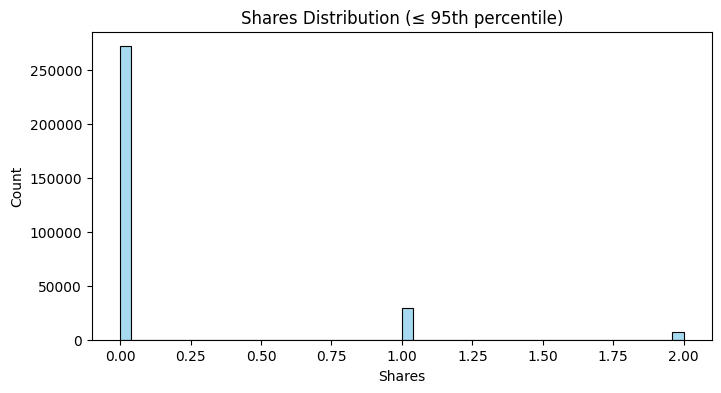

findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found 

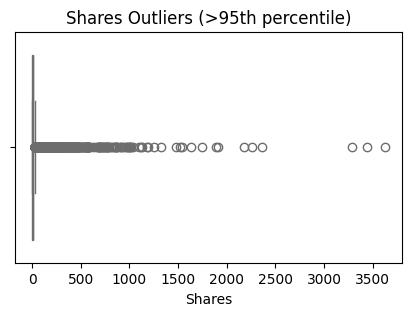


📊 Comments Distribution:
95th percentile = 4.00, max = 12332.00, outliers = 14366 (3.13%)


findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found 

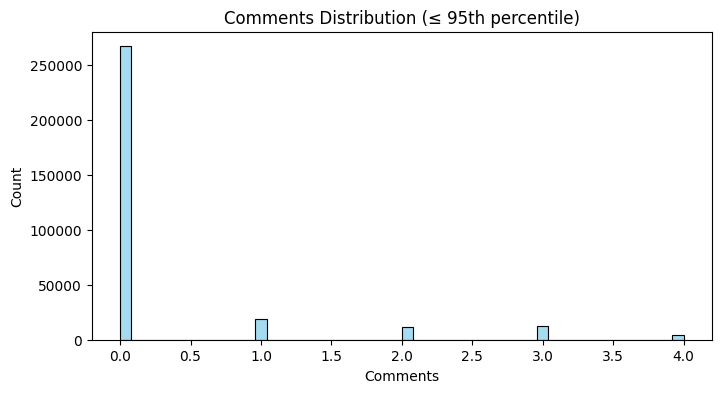

findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found 

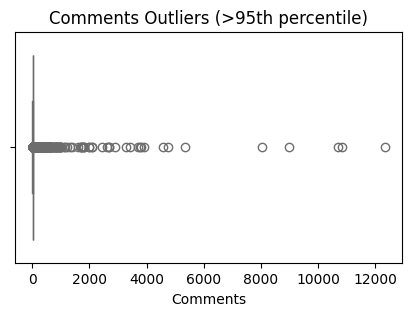


📊 Likes Distribution:
95th percentile = 9.00, max = 143520.00, outliers = 22415 (4.88%)


findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found 

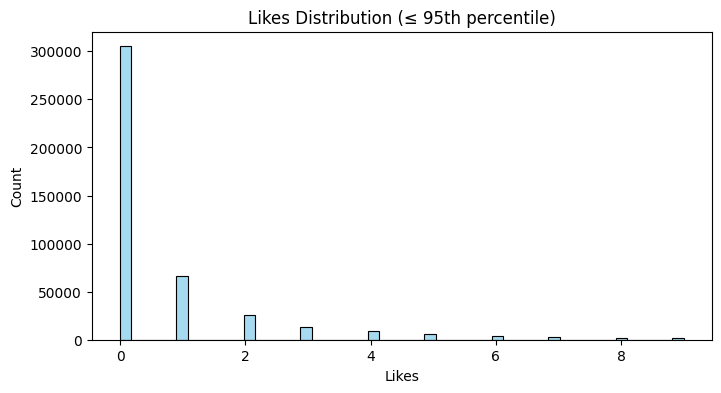

findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found 

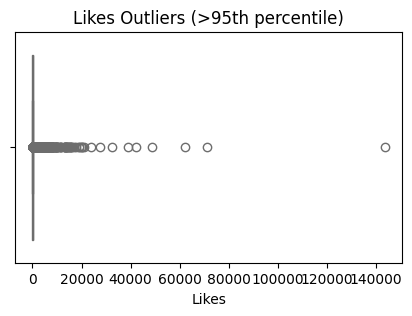


📊 Saves Distribution:
95th percentile = 3.00, max = 11415.00, outliers = 14527 (3.16%)


findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found 

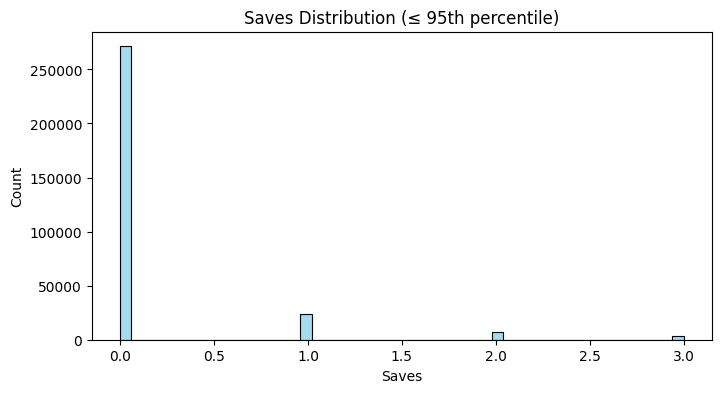

findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found 

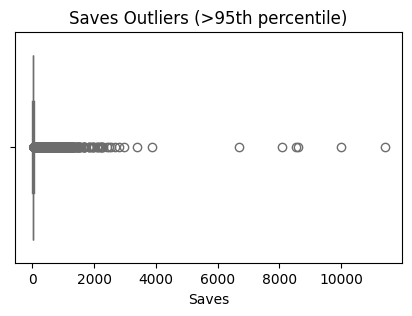


🌍 Top 10 User Locations:


user_location
广东    47116
上海    41348
四川    22746
浙江    18740
江苏    17697
福建    17393
北京    14455
山东    11972
湖南     8999
湖北     8538
Name: count, dtype: int64

findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found 

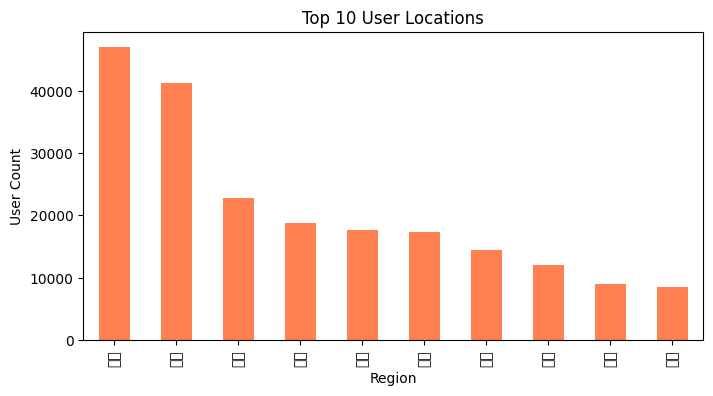


🚻 Gender Distribution:


gender
女          218852
Unknown    197167
男           43316
Name: count, dtype: int64

findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22899 (\N{CJK UNIFIED IDEOGRAPH-5973}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft 

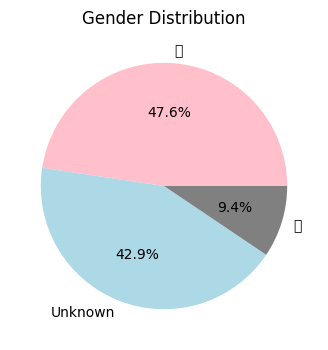

findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found 


👶 Birth Year Distribution (with outlier visualization):
2.5th percentile = 1983, 97.5th percentile = 2018
Lower outliers: 780 (2.44%)
Upper outliers: 710 (2.22%)


findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found 

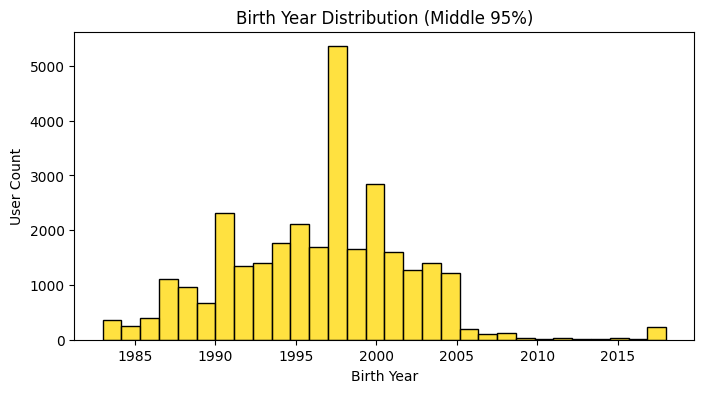

findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found 

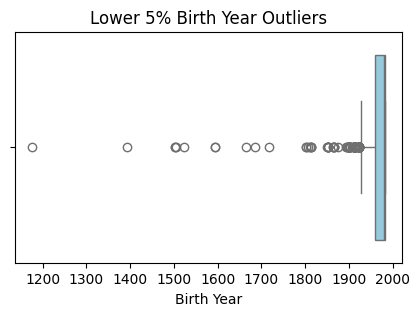

findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: PingFang SC, Microsoft YaHei, SimHei
findfont: Generic family 'sans-serif' not found 

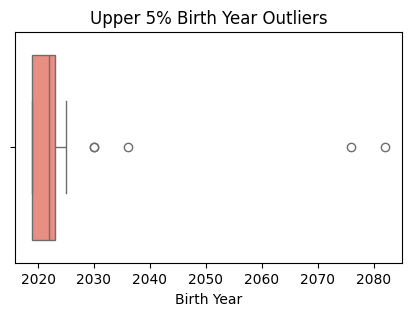


🏠 User Address Samples:
3          陕西西安
5          天津津南
7            中国
8          四川成都
13    地球的某一片红薯地
14    地球的某一片红薯地
15           中国
17           上海
18    地球的某一片红薯地
19    地球的某一片红薯地
Name: user_address, dtype: object
Non-null ratio: 50.89%


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ✅ 确保中文可显示
plt.rcParams['font.sans-serif'] = ['PingFang SC', 'Microsoft YaHei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

print("==== 🧾 Dataset Overview ====")
print(f"Total rows: {len(cleaned_df)}")
print(f"Total columns: {len(cleaned_df.columns)}\n")

# =============================
# 1️⃣ ID Uniqueness
# =============================
total = len(cleaned_df)
unique = cleaned_df['post_id'].nunique()
duplicates = total - unique
print(f"🆔 ID Uniqueness Check: Total {total}, Unique IDs {unique}, Duplicates {duplicates}.")
if duplicates > 0:
    dup_ids = cleaned_df['post_id'].value_counts().loc[lambda x: x > 1]
    print("⚠️ Example of Duplicate IDs:\n", dup_ids.head())

# =============================
# 2️⃣ Post Time Distribution
# =============================
if 'post_time' in cleaned_df.columns:
    cleaned_df['post_time'] = pd.to_datetime(cleaned_df['post_time'], errors='coerce')
    print("\n🕒 Post Time Range:")
    print(f"Earliest: {cleaned_df['post_time'].min()}  Latest: {cleaned_df['post_time'].max()}")
    print("📈 Posts per Month:")
    cleaned_df['Month'] = cleaned_df['post_time'].dt.to_period('M')
    post_counts = cleaned_df['Month'].value_counts().sort_index()
    display(post_counts.head(10))
    plt.figure(figsize=(10,4))
    post_counts.plot(kind='bar', color='teal', title='Monthly Post Count')
    plt.xlabel('Month')
    plt.ylabel('Number of Posts')
    plt.show()

# =============================
# 3️⃣ Engagement Metrics with Outlier Handling
# =============================

eng_col_map = {
    'interaction_times': 'Interaction Times',
    'shares': 'Shares',
    'comments': 'Comments',
    'likes': 'Likes',
    'saves': 'Saves'
}

def plot_with_outlier_split(df, col):
    if col not in df.columns:
        print(f"⚠️ Column {col} not found.")
        return
    if not np.issubdtype(df[col].dropna().dtype, np.number):
        print(f"⚠️ Column {col} is not numeric, skipping.")
        return

    col_en = eng_col_map.get(col, col)
    q95 = df[col].quantile(0.95)
    qmax = df[col].max()
    num_outliers = (df[col] > q95).sum()

    print(f"\n📊 {col_en} Distribution:")
    print(f"95th percentile = {q95:.2f}, max = {qmax:.2f}, outliers = {num_outliers} ({num_outliers/len(df)*100:.2f}%)")

    plt.figure(figsize=(8,4))
    sns.histplot(df[df[col] <= q95][col], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'{col_en} Distribution (≤ 95th percentile)')
    plt.xlabel(col_en)
    plt.ylabel('Count')
    plt.show()

    if num_outliers > 0:
        plt.figure(figsize=(5,3))
        sns.boxplot(x=df[df[col] > q95][col], color='salmon')
        plt.title(f'{col_en} Outliers (>95th percentile)')
        plt.xlabel(col_en)
        plt.show()
    else:
        print(f"✅ No outliers beyond 95th percentile for {col_en}")

engagement_cols = ['interaction_times', 'shares', 'comments', 'likes', 'saves']
for col in engagement_cols:
    if col in cleaned_df.columns:
        plot_with_outlier_split(cleaned_df, col)

# =============================
# 4️⃣ User Location Distribution
# =============================
if 'user_location' in cleaned_df.columns:
    top_location = cleaned_df['user_location'].value_counts(dropna=True).head(10)
    print("\n🌍 Top 10 User Locations:")
    display(top_location)
    plt.figure(figsize=(8,4))
    top_location.plot(kind='bar', color='coral')
    plt.title('Top 10 User Locations')
    plt.xlabel('Region')
    plt.ylabel('User Count')
    plt.show()

# =============================
# 5️⃣ Gender Distribution
# =============================
if 'gender' in cleaned_df.columns:
    print("\n🚻 Gender Distribution:")

    cleaned_df['gender'] = cleaned_df['gender'].fillna('Unknown')
    cleaned_df.loc[cleaned_df['gender'].isin(['未知', '未填写', '不明', 'Unknown']), 'gender'] = 'Unknown'

    gender_counts = cleaned_df['gender'].value_counts(dropna=False)
    display(gender_counts)

    plt.figure(figsize=(4,4))
    gender_counts.plot(kind='pie', autopct='%.1f%%', colors=['pink','lightblue','gray'])
    plt.title('Gender Distribution')
    plt.ylabel('')
    plt.show()

# =============================
# 6️⃣ Birth Year Distribution (showing middle 90% + outliers)
# =============================
if 'birth_year' in cleaned_df.columns:
    print("\n👶 Birth Year Distribution (with outlier visualization):")
    
    cleaned_df['birth_year'] = pd.to_numeric(cleaned_df['birth_year'], errors='coerce')
    birth_series = cleaned_df['birth_year'].dropna()

    q0025 = birth_series.quantile(0.025)
    q0975 = birth_series.quantile(0.975)

    lower_outliers = birth_series[birth_series < q0025]
    middle_values = birth_series[(birth_series >= q0025) & (birth_series <= q0975)]
    upper_outliers = birth_series[birth_series > q0975]

    print(f"2.5th percentile = {q0025:.0f}, 97.5th percentile = {q0975:.0f}")
    print(f"Lower outliers: {len(lower_outliers)} ({len(lower_outliers)/len(birth_series)*100:.2f}%)")
    print(f"Upper outliers: {len(upper_outliers)} ({len(upper_outliers)/len(birth_series)*100:.2f}%)")

    plt.figure(figsize=(8,4))
    sns.histplot(middle_values, bins=30, color='gold', edgecolor='black')
    plt.title('Birth Year Distribution (Middle 95%)')
    plt.xlabel('Birth Year')
    plt.ylabel('User Count')
    plt.show()

    if len(lower_outliers) > 0:
        plt.figure(figsize=(5,3))
        sns.boxplot(x=lower_outliers, color='skyblue')
        plt.title('Lower 5% Birth Year Outliers')
        plt.xlabel('Birth Year')
        plt.show()

    if len(upper_outliers) > 0:
        plt.figure(figsize=(5,3))
        sns.boxplot(x=upper_outliers, color='salmon')
        plt.title('Upper 5% Birth Year Outliers')
        plt.xlabel('Birth Year')
        plt.show()

# =============================
# 7️⃣ User Address Samples
# =============================
if 'user_address' in cleaned_df.columns:
    print("\n🏠 User Address Samples:")
    sample_addr = cleaned_df['user_address'].dropna().head(10)
    print(sample_addr)
    print(f"Non-null ratio: {(cleaned_df['user_address'].notna().mean()*100):.2f}%")